## $\color{red}{\text{Data source}}$

 Covi19 analysis \
'https://covid19.who.int

## $\color{red}{\text{Import required libraries}}$


In [1]:
## Data reading
import numpy as np
import pandas as pd
import requests
import missingno as msno
import datetime

##visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## $ \color{red}{\text{Downloading data from WHO website}}$

In [2]:
url='https://covid19.who.int/WHO-COVID-19-global-data.csv'
r = requests.get(url, verify=False,stream=True)
url_content = r.content
csv_file = open('covid-19.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [3]:
df=pd.read_csv("covid-19.csv",parse_dates=['Date_reported'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169433 entries, 0 to 169432
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      169433 non-null  datetime64[ns]
 1   Country_code       168718 non-null  object        
 2   Country            169433 non-null  object        
 3   WHO_region         169433 non-null  object        
 4   New_cases          169433 non-null  int64         
 5   Cumulative_cases   169433 non-null  int64         
 6   New_deaths         169433 non-null  int64         
 7   Cumulative_deaths  169433 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 10.3+ MB


<AxesSubplot:>

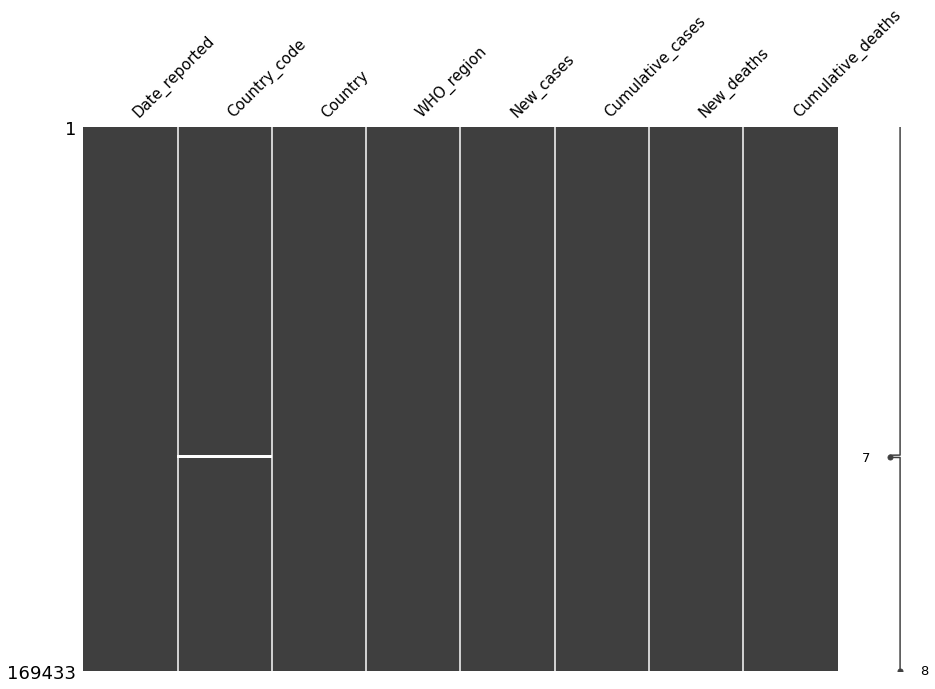

In [5]:
msno.matrix(df, figsize=(15,10), fontsize=15, sparkline=True)

In [6]:
df[df["Country_code"].isnull()]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
102234,2020-01-03,NaN,Namibia,AFRO,0,0,0,0
102235,2020-01-04,NaN,Namibia,AFRO,0,0,0,0
102236,2020-01-05,NaN,Namibia,AFRO,0,0,0,0
102237,2020-01-06,NaN,Namibia,AFRO,0,0,0,0
102238,2020-01-07,NaN,Namibia,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
102944,2021-12-13,NaN,Namibia,AFRO,0,131230,0,3575
102945,2021-12-14,NaN,Namibia,AFRO,1860,133090,2,3577
102946,2021-12-15,NaN,Namibia,AFRO,0,133090,0,3577
102947,2021-12-16,NaN,Namibia,AFRO,1064,134154,2,3579


The counry coresponding to Namibia is missing. Let's fill that with the code '**NA**'

In [7]:
index=df[df["Country_code"].isnull()].index.tolist()

In [8]:
df.at[index,"Country_code"]='NA'

In [9]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
169428,2021-12-13,ZW,Zimbabwe,AFRO,2138,167140,3,4738
169429,2021-12-14,ZW,Zimbabwe,AFRO,4872,172012,2,4740
169430,2021-12-15,ZW,Zimbabwe,AFRO,5678,177690,5,4745
169431,2021-12-16,ZW,Zimbabwe,AFRO,4367,182057,14,4759


In [10]:
df.Country=np.where(df.Country.str.startswith('o'),"Palestine",df.Country)

In [11]:
df=df.drop(["Cumulative_cases", "Cumulative_deaths"],1)

In [12]:
df.select_dtypes(include=['int64']).lt(0).any()

New_cases     True
New_deaths    True
dtype: bool

In [13]:
for i in df.index[df["New_cases"]<0].tolist():
    df.at[i,"New_cases"]= -1*df.at[i,"New_cases"]
    
for i in df.index[df["New_deaths"]<0].tolist():
    df.at[i,"New_deaths"]= -1*df.at[i,"New_deaths"]   

In [14]:
df['Date_reported'] = df['Date_reported'].apply(lambda x: pd.to_datetime(x).date())


In [15]:
cumsumcountry=[]
cumdeath=[]
for country in df["Country"].unique().tolist():
  cumsumcountry.extend(df[df["Country"]==country].New_cases.cumsum().values.tolist())
  cumdeath.extend(df[df["Country"]==country].New_deaths.cumsum().values.tolist())

df=df.assign(Cumulative_cases=cumsumcountry)
df=df.assign(Cumulative_deaths=cumdeath)

In [16]:
df.to_csv("covid-19who.csv",index=None)

In [17]:
df['Year']=pd.DatetimeIndex(df['Date_reported']).year

In [18]:
df['Month']=pd.DatetimeIndex(df['Date_reported']).month

In [19]:
df=df[df["Date_reported"]<datetime.date(2021, 12, 17)]

In [20]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,Year,Month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...
169427,2021-12-12,ZW,Zimbabwe,AFRO,3004,6,165002,4737,2021,12
169428,2021-12-13,ZW,Zimbabwe,AFRO,2138,3,167140,4740,2021,12
169429,2021-12-14,ZW,Zimbabwe,AFRO,4872,2,172012,4742,2021,12
169430,2021-12-15,ZW,Zimbabwe,AFRO,5678,5,177690,4747,2021,12


In [21]:
df.select_dtypes(include=['int64']).lt(0).any()

New_cases            False
New_deaths           False
Cumulative_cases     False
Cumulative_deaths    False
Year                 False
Month                False
dtype: bool

In [22]:
total_cases= df.groupby(["Date_reported","Year", "Month","WHO_region"],as_index=False)["New_cases", "New_deaths", "Cumulative_cases", "Cumulative_deaths"].sum()

In [23]:
total_cases

,Date_reported,Year,Month,WHO_region,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths
0,2020-01-03,2020,1,AFRO,0,0,0,0
1,2020-01-03,2020,1,AMRO,0,0,0,0
2,2020-01-03,2020,1,EMRO,0,0,0,0
3,2020-01-03,2020,1,EURO,0,0,0,0
4,2020-01-03,2020,1,Other,0,0,0,0
...,...,...,...,...,...,...,...,...
4993,2021-12-16,2021,12,EMRO,0,0,16970721,312896
4994,2021-12-16,2021,12,EURO,437475,4370,93193062,1615718
4995,2021-12-16,2021,12,Other,0,0,764,13
4996,2021-12-16,2021,12,SEARO,13354,409,44787831,715778


In [24]:
who_regionwise= total_cases.groupby("WHO_region",as_index=False)["New_cases", "New_deaths"].sum()

In [25]:
who_regionwise.sort_values(by=['New_cases'],ascending=False)

,WHO_region,New_cases,New_deaths
1,AMRO,99178857,2377840
3,EURO,93193062,1615718
5,SEARO,44787831,715778
2,EMRO,16970721,312896
6,WPRO,10705136,149566
0,AFRO,6678623,154606
4,Other,764,13


## Total cases and deaths world wide

In [26]:
who_regionwise.New_cases.sum()

271514994

In [27]:
who_regionwise.New_deaths.sum()

5326417

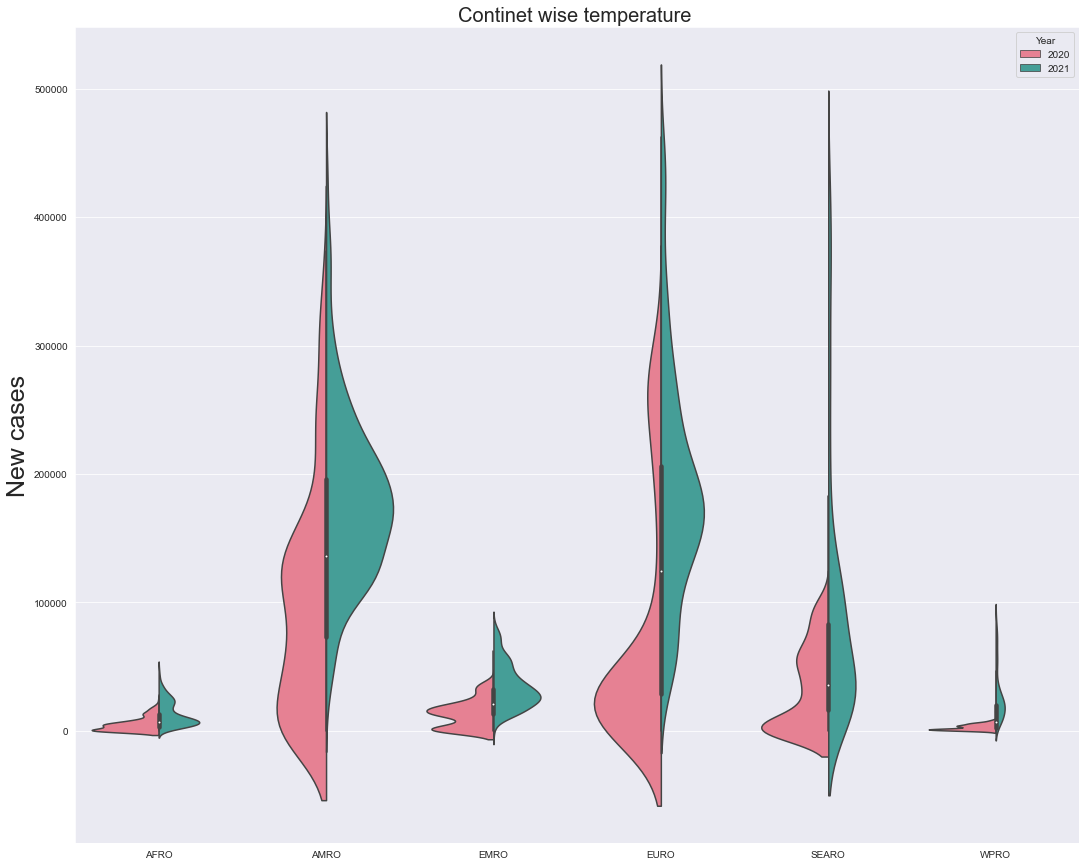

In [28]:
total_cases1=total_cases.drop(total_cases[total_cases["WHO_region"]=='Other'].index)
sns.set_style('darkgrid')
plt.figure(figsize=(18,15))

ax = sns.violinplot(y="New_cases", x="WHO_region", hue="Year",
                    data=total_cases1, palette="husl", split=True)
plt.ylabel("New cases", size=25)
plt.title("Continet wise temperature ",size=20);
plt.xlabel(None, size=25);


In [29]:
df["IFR"]=(df["Cumulative_deaths"]/df["Cumulative_cases"])*100


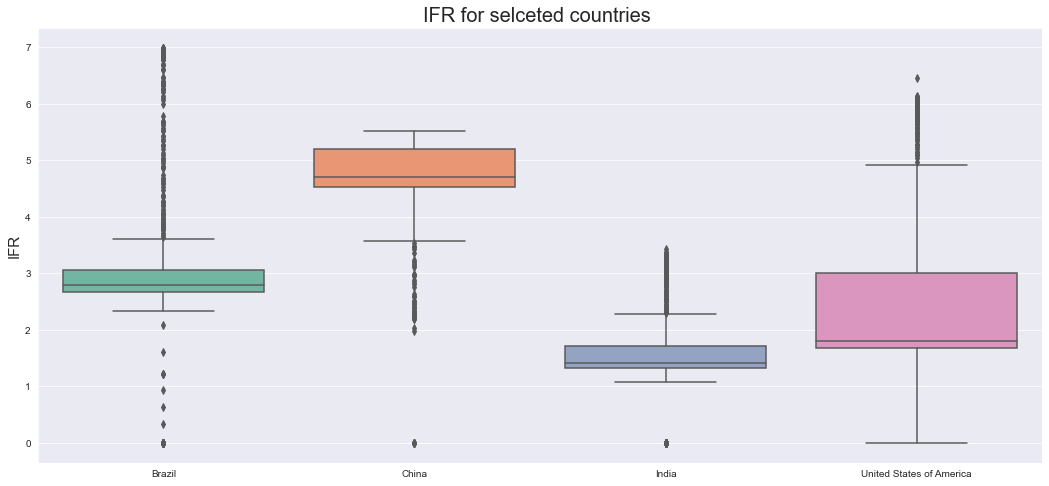

In [30]:
df1=df.loc[df['Country'].isin(["India", "China", "Brazil", "United States of America"])]
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
sns.boxplot(
            y="IFR",
            x="Country",
            data=df1,
            palette="Set2")
plt.xlabel(None, size=20)
plt.ylabel("IFR",size=15)
plt.title("IFR for selceted countries ",size=20);
#plt.ylim([-1, 60])
plt.show()

In [31]:
global1=df.groupby("Date_reported",as_index=False)["New_cases","New_deaths"].sum()

In [32]:
global1

,Date_reported,New_cases,New_deaths
0,2020-01-03,0,0
1,2020-01-04,1,0
2,2020-01-05,0,0
3,2020-01-06,3,0
4,2020-01-07,0,0
...,...,...,...
709,2021-12-12,597950,6609
710,2021-12-13,468329,4913
711,2021-12-14,441532,5847
712,2021-12-15,739301,7149


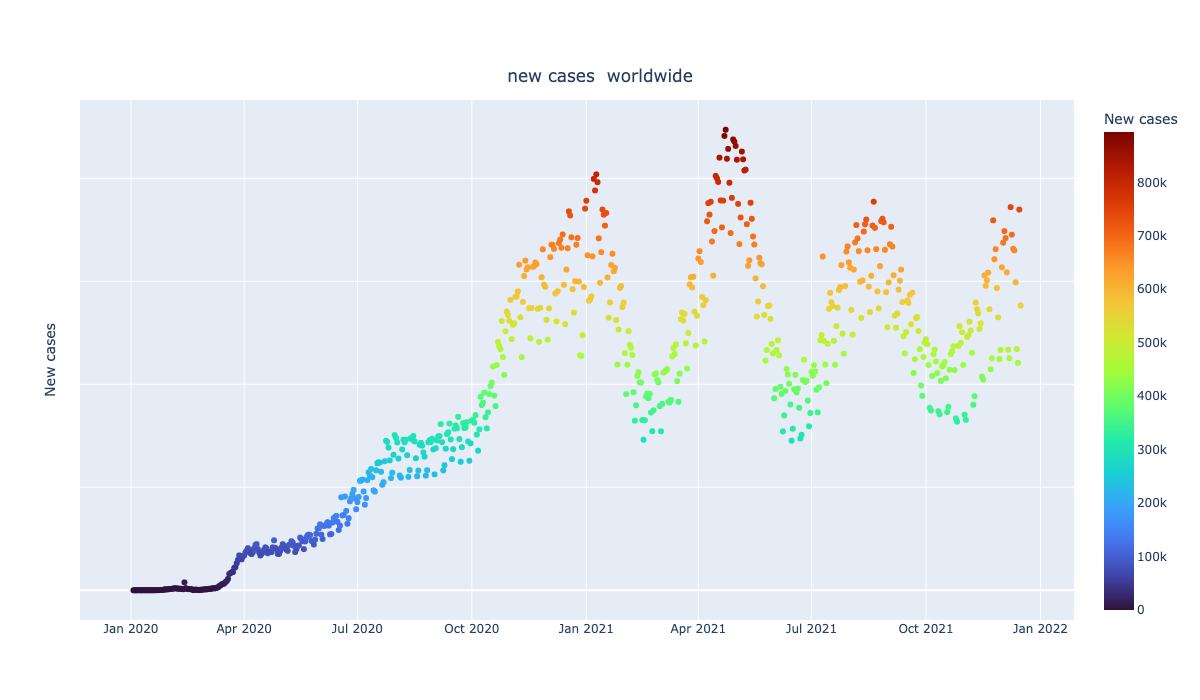

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=global1.Date_reported.values, y=global1.New_cases.values,
                    mode='markers', marker=dict(
        color=global1.New_cases.values,
        colorbar=dict(
            title="New cases"
        ),
        colorscale="turbo"
    ),
                    name='India'))
fig.update_yaxes(
    showticklabels=False
    )
fig.update_layout(title={
        'text': " new cases  worldwide",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title=None,
                   yaxis_title='New cases')
fig.show('png',width=1200, height=700)

## By who_regions

In [34]:
gloabl=total_cases.groupby("Date_reported",as_index=False)["Cumulative_cases","Cumulative_deaths"].sum()

In [35]:
gloabl

,Date_reported,Cumulative_cases,Cumulative_deaths
0,2020-01-03,0,0
1,2020-01-04,1,0
2,2020-01-05,1,0
3,2020-01-06,4,0
4,2020-01-07,4,0
...,...,...,...
709,2021-12-12,269312983,5302489
710,2021-12-13,269781312,5307402
711,2021-12-14,270222844,5313249
712,2021-12-15,270962145,5320398


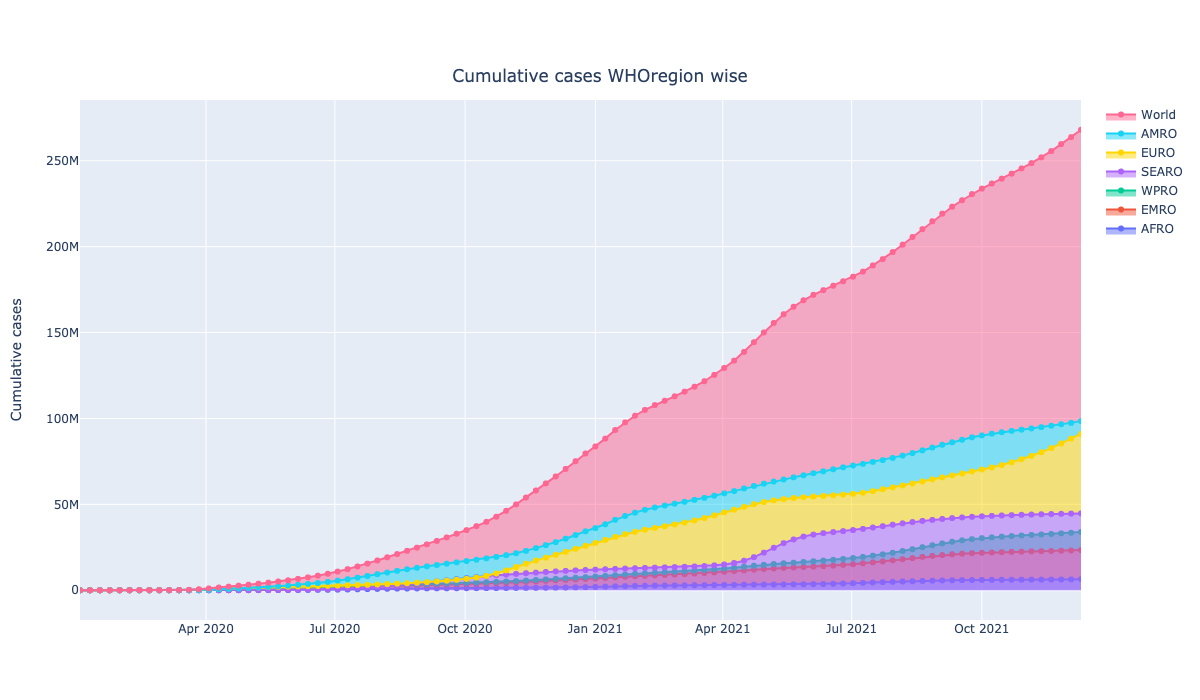

In [36]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="AFRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AFRO"].Cumulative_cases.values[0::7],
                    mode='lines+markers',stackgroup='one',
                    name='AFRO'))
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="EMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EMRO"].Cumulative_cases.values[0::7],
                    mode='lines+markers',stackgroup='one',
                    name='EMRO'))
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="WPRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="WPRO"].Cumulative_cases.values[0::7],
                    mode='lines+markers', stackgroup='one',
                    name='WPRO'))
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="SEARO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="SEARO"].Cumulative_cases.values[0::7],
                    mode='lines+markers', fill='tonexty',
                    name='SEARO'))
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="EURO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EURO"].Cumulative_cases.values[0::7],
                    mode='lines+markers', fill='tonexty', marker={'color':"#ffd700"},
                    name='EURO'))
fig.add_trace(go.Scatter(x=total_cases[total_cases["WHO_region"]=="AMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AMRO"].Cumulative_cases.values[0::7],
                    mode='lines+markers', fill='tonexty', 
                    name='AMRO'))
fig.add_trace(go.Scatter(x=gloabl.Date_reported.values[::7], y=gloabl.Cumulative_cases.values[0::7],
                    mode='lines+markers', fill='tonexty',
                    name='World'))


fig.update_layout(title={
        'text': "Cumulative cases WHOregion wise",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title=None,
                   yaxis_title='Cumulative cases')
fig.show("png",width=1200, height=700)

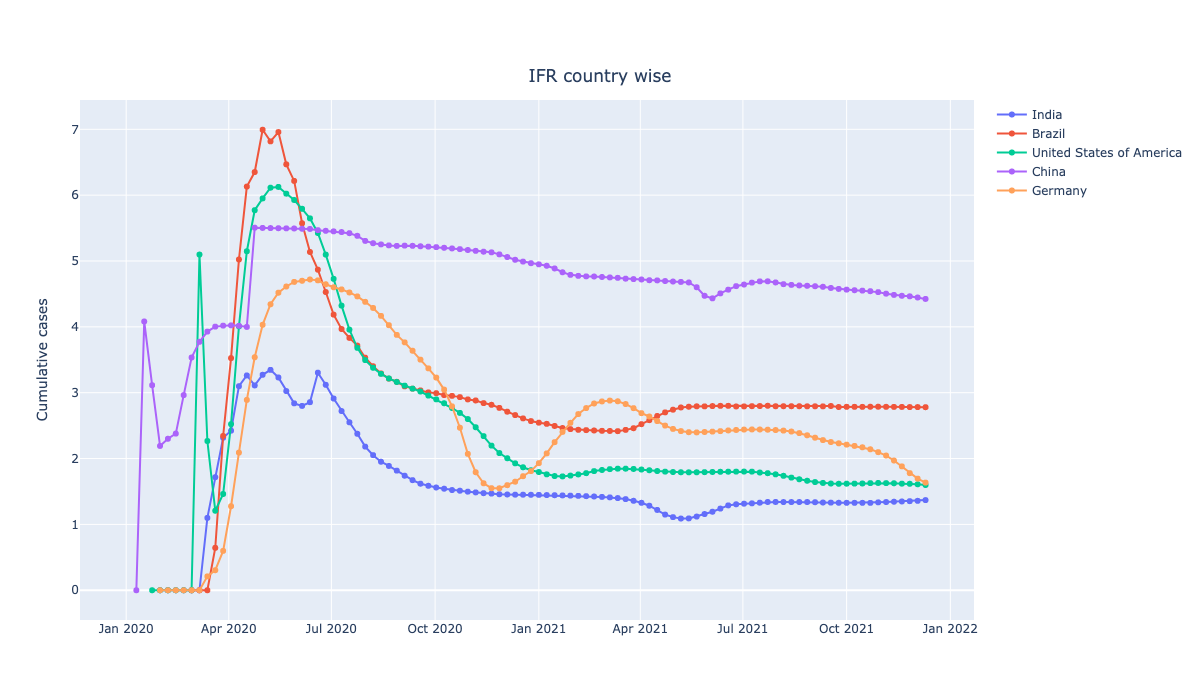

In [37]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df[df["Country"]=="India"].Date_reported.values[::7], y=df[df["Country"]=="India"].IFR.values[0::7],
                    mode='lines+markers',
                    name='India'))
fig.add_trace(go.Scatter(x=df[df["Country"]=="Brazil"].Date_reported.values[::7], y=df[df["Country"]=="Brazil"].IFR.values[0::7],
                    mode='lines+markers',
                    name='Brazil'))
fig.add_trace(go.Scatter(x=df[df["Country"]=="United States of America"].Date_reported.values[::7], y=df[df["Country"]=="United States of America"].IFR.values[0::7],
                    mode='lines+markers',
                    name='United States of America'))
fig.add_trace(go.Scatter(x=df[df["Country"]=="China"].Date_reported.values[::7], y=df[df["Country"]=="China"].IFR.values[0::7],
                    mode='lines+markers',
                    name='China'))
fig.add_trace(go.Scatter(x=df[df["Country"]=="Germany"].Date_reported.values[::7], y=df[df["Country"]=="Germany"].IFR.values[0::7],
                    mode='lines+markers',
                    name='Germany'))
fig.update_layout(title={
        'text': "IFR country wise",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title=None,
                   yaxis_title='Cumulative cases')
fig.show("png",width=1200, height=700)
#fig.show()

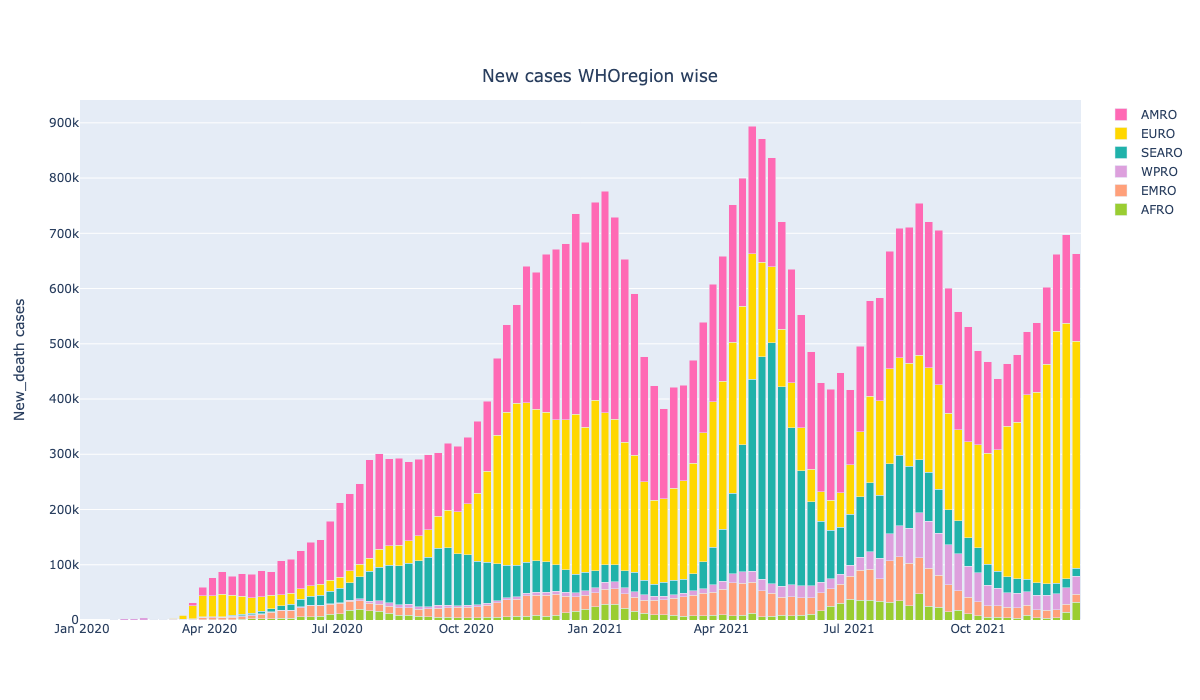

In [38]:
fig = go.Figure(data=[
    go.Bar(name='AFRO', x=total_cases[total_cases["WHO_region"]=="AFRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AFRO"].New_cases.values[0::7],marker={'color':"#9acd32"}),
    go.Bar(name='EMRO', x=total_cases[total_cases["WHO_region"]=="EMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EMRO"].New_cases.values[0::7],marker={'color':"#ffa07a"}),
    go.Bar(name='WPRO	', x=total_cases[total_cases["WHO_region"]=="WPRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="WPRO"].New_cases.values[0::7],marker={'color':"#dda0dd"}),
    go.Bar(name='SEARO', x=total_cases[total_cases["WHO_region"]=="SEARO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="SEARO"].New_cases.values[0::7],marker={'color':"#20b2aa"}),
    go.Bar(name='EURO', x=total_cases[total_cases["WHO_region"]=="EURO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EURO"].New_cases.values[0::7],marker={'color':"#ffd700"}),
    go.Bar(name='AMRO', x=total_cases[total_cases["WHO_region"]=="AMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AMRO"].New_cases.values[0::7],marker={'color':"#ff69b4"}),
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_layout(title={
        'text': "New cases WHOregion wise",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title=None,
                   yaxis_title='New_death cases')
fig.show('png',width=1200, height=700)
#fig.show()



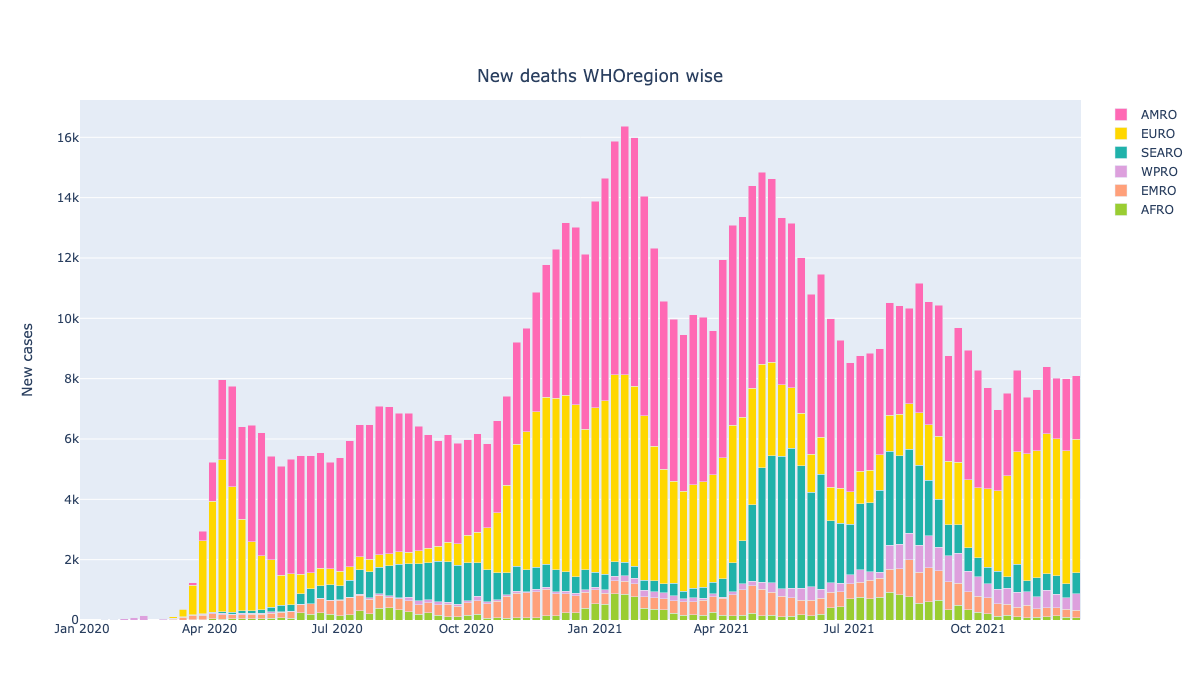

In [39]:
fig = go.Figure(data=[
    go.Bar(name='AFRO', x=total_cases[total_cases["WHO_region"]=="AFRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AFRO"].New_deaths.values[0::7],marker={'color':"#9acd32"}),
    go.Bar(name='EMRO', x=total_cases[total_cases["WHO_region"]=="EMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EMRO"].New_deaths.values[0::7],marker={'color':"#ffa07a"}),
    go.Bar(name='WPRO', x=total_cases[total_cases["WHO_region"]=="WPRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="WPRO"].New_deaths.values[0::7],marker={'color':"#dda0dd"}),
    go.Bar(name='SEARO', x=total_cases[total_cases["WHO_region"]=="SEARO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="SEARO"].New_deaths.values[0::7],marker={'color':"#20b2aa"}),
    go.Bar(name='EURO', x=total_cases[total_cases["WHO_region"]=="EURO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="EURO"].New_deaths.values[0::7],marker={'color':"#ffd700"}),
    go.Bar(name='AMRO', x=total_cases[total_cases["WHO_region"]=="AMRO"].Date_reported.values[::7], y=total_cases[total_cases["WHO_region"]=="AMRO"].New_deaths.values[0::7],marker={'color':"#ff69b4"}),
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_layout(title={
        'text': "New deaths WHOregion wise",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title=None,
                   yaxis_title='New cases')
fig.show('png',width=1200, height=700)
#fig.show()



In [40]:
first=total_cases.loc[total_cases['Year']==2020]
second=total_cases.loc[total_cases['Year']==2021]

In [41]:
total_cases1=total_cases.drop(total_cases[total_cases["WHO_region"]=='Other'].index)

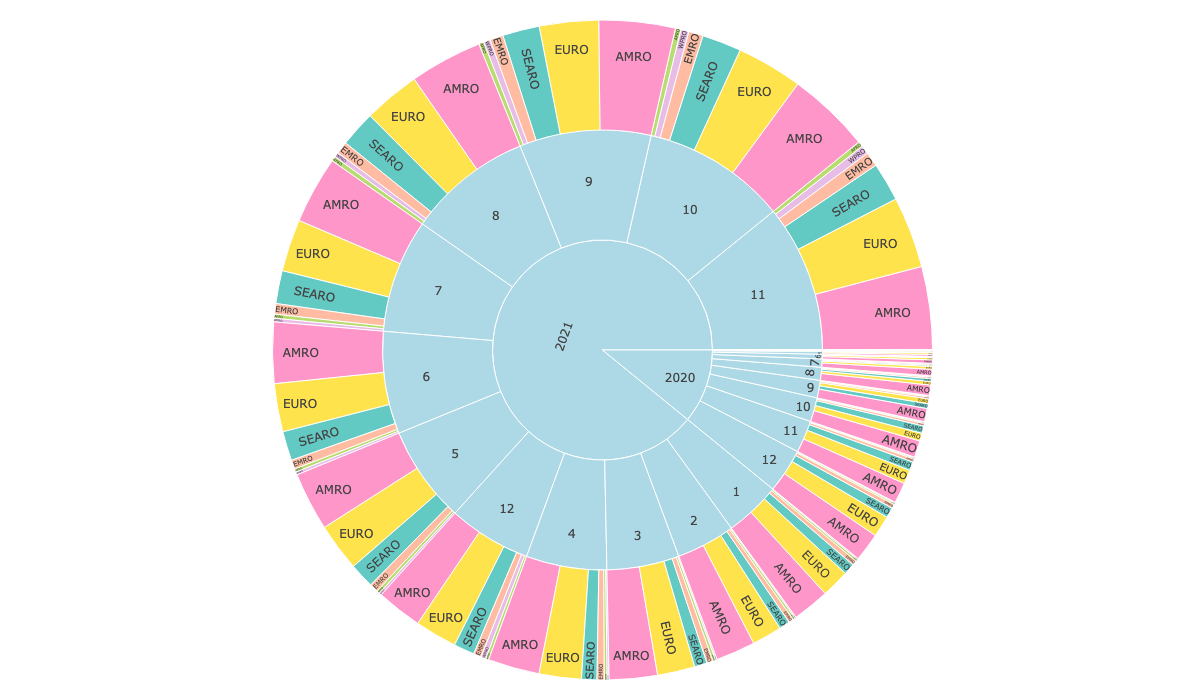

In [42]:
import plotly.express as px
fig = px.sunburst(total_cases1, path=[ 'Year', 'Month','WHO_region' ], values='Cumulative_cases',  color='WHO_region',
                  color_discrete_map={'(?)':'lightblue', 'AFRO':'#9acd32', 'AMRO':'#ff69b4', 'EURO':'#ffd700','SEARO':'#20b2aa', 'EMRO':'#ffa07a', 'WPRO':'#dda0dd'})
fig.update_layout(
    margin = dict(t=20, l=20, r=15, b=20))
fig.show("png",width=1200, height=700)